In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tree_data = pd.read_csv(r"C:\Users\shiva\Downloads\2015_Street_Tree_Census_-_Tree_Data_20250924.csv")
pd.set_option('display.max_columns', None)

In [3]:
tree_data.head(10)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,NaN,NaN,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
5,190422,106099,08/30/2015,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,Helpful,NoDamage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,8 COLUMBUS AVENUE,10023,New York,107,1,Manhattan,3,67,27,MN14,Lincoln Square,1014500,New York,40.770046,-73.984950,9.884187e+05,219825.5227,3.0,145.0,1076229.0,1.011310e+09
6,190426,106099,08/30/2015,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,Helpful,NoDamage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,120 WEST 60 STREET,10023,New York,107,1,Manhattan,3,67,27,MN14,Lincoln Square,1014500,New York,40.770210,-73.985338,9.883112e+05,219885.2785,3.0,145.0,1076229.0,1.011310e+09
7,208649,103940,09/07/2015,9,0,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,NoDamage,Volunteer,MetalGrates,No,Yes,No,No,No,No,No,No,No,311 WEST 50 STREET,10019,New York,104,1,Manhattan,3,75,27,MN15,Clinton,1012700,New York,40.762724,-73.987297,9.877691e+05,217157.8561,3.0,133.0,1086093.0,1.010410e+09
8,209610,407443,09/08/2015,6,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,65 JEROME AVENUE,10305,Staten Island,502,5,Staten Island,50,64,23,SI14,Grasmere-Arrochar-Ft. Wadsworth,5006400,New York,40.596579,-74.076255,9.630732e+05,156635.5542,NaN,NaN,NaN,NaN
9,192755,207508,08/31/2015,21,0,OffsetFromCurb,Alive,Fair,Platanus x acerifolia,London planetree,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,638 AVENUE Z,11223,Brooklyn,313,3,Brooklyn,47,45,23,BK26,Gravesend,3037402,New York,40.586357,-73.969744,9.926537e+05,152903.6306,47.0,37402.0,3320727.0,3.072350e+09


In [4]:
tree_data.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [5]:
tree_subdata = tree_data[['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
        'sidewalk', 'user_type', 'problems']]
tree_subdata

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,NaN,NaN,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,NaN,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,NaN,NoDamage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [6]:
tree_subdata.isna().sum()

tree_id            0
block_id           0
created_at         0
tree_dbh           0
stump_diam         0
curb_loc           0
status             0
health         31616
spc_latin      31619
spc_common     31619
steward       519438
sidewalk       31616
user_type          0
problems      457944
dtype: int64

In [7]:
tree_subdata_stump = tree_subdata[(tree_subdata["status"]=="Stump")]
tree_subdata_stump.isna().sum()

tree_id           0
block_id          0
created_at        0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        17654
spc_latin     17654
spc_common    17654
steward       17654
sidewalk      17654
user_type         0
problems      17654
dtype: int64

In [8]:
tree_subdata_dead = tree_subdata[(tree_subdata["status"]=="Dead")]
tree_subdata_dead.isna().sum()

tree_id           0
block_id          0
created_at        0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        13961
spc_latin     13960
spc_common    13960
steward       13961
sidewalk      13961
user_type         0
problems      13961
dtype: int64

# NaN value of health
## when status is stump = 17654
## when status is dead = 13960
## total NaN value of health = 17654 + 13960 = 31614

In [9]:
mask = ((tree_subdata["status"]=="Dead") | (tree_subdata["status"] == "Stump"))
tree_subdata.loc[mask, "health"] = tree_subdata.loc[mask, 'health'].fillna("Not Applicable")
tree_subdata.loc[mask] = tree_subdata.loc[mask].fillna("Not Applicable")
tree_subdata.loc[mask]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,sidewalk,user_type,problems
37,211205,302080,09/09/2015,0,16,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable
57,187807,506266,08/29/2015,0,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable
196,208322,222858,09/07/2015,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable
209,209058,415850,09/08/2015,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable
239,203597,301947,09/04/2015,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,108193,08/18/2015,3,0,OffsetFromCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable
683695,170888,231931,08/24/2015,0,5,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable
683697,177922,410634,08/26/2015,0,17,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable
683698,193791,208850,09/01/2015,3,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable


In [10]:
tree_subdata.isna().sum()

tree_id            0
block_id           0
created_at         0
tree_dbh           0
stump_diam         0
curb_loc           0
status             0
health             1
spc_latin          5
spc_common         5
steward       487823
sidewalk           1
user_type          0
problems      426329
dtype: int64

In [11]:
tree_subdata.loc[tree_subdata['status']=='Alive','problems'].value_counts()

problems
Stones                                                                        95673
BranchLights                                                                  29452
Stones,BranchLights                                                           17808
RootOther                                                                     11418
TrunkOther                                                                    11143
                                                                              ...  
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther        1
MetalGrates,RootOther,WiresRope,TrunkLights,BranchLights,BranchOther              1
MetalGrates,WiresRope,TrunkLights,BranchLights,BranchOther                        1
Stones,MetalGrates,TrunkLights,TrunkOther                                         1
MetalGrates,TrunkOther,Sneakers                                                   1
Name: count, Length: 231, dtype: int64

In [12]:
tree_subdata[tree_subdata['health'].isna()]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,sidewalk,user_type,problems
32889,245041,413012,09/21/2015,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,green ash,NaN,Damage,TreesCount Staff,NaN


In [13]:
tree_subdata['health'].fillna("Good", inplace=True)
tree_subdata['steward'].fillna("None", inplace=True)
tree_subdata['sidewalk'].fillna("NoDamage", inplace=True)
tree_subdata['problems'].fillna("No", inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_10564\1696863689.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tree_subdata['health'].fillna("Good", inplace=True)
C:\Users\shiva\AppData\Local\Temp\ipykernel_10564\1696863689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_subdata['health'].fillna("Good", inplace=True)
C:\Users\shiva\

In [14]:
tree_subdata.loc[32889,:]

tree_id                       245041
block_id                      413012
created_at                09/21/2015
tree_dbh                          16
stump_diam                         0
curb_loc                      OnCurb
status                         Alive
health                          Good
spc_latin     Fraxinus pennsylvanica
spc_common                 green ash
steward                         None
sidewalk                      Damage
user_type           TreesCount Staff
problems                          No
Name: 32889, dtype: object

In [15]:
tree_subdata[tree_subdata['tree_id'] == 187807]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,sidewalk,user_type,problems
57,187807,506266,08/29/2015,0,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable


In [16]:
tree_subdata.isna().sum()

tree_id       0
block_id      0
created_at    0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     5
spc_common    5
steward       0
sidewalk      0
user_type     0
problems      0
dtype: int64

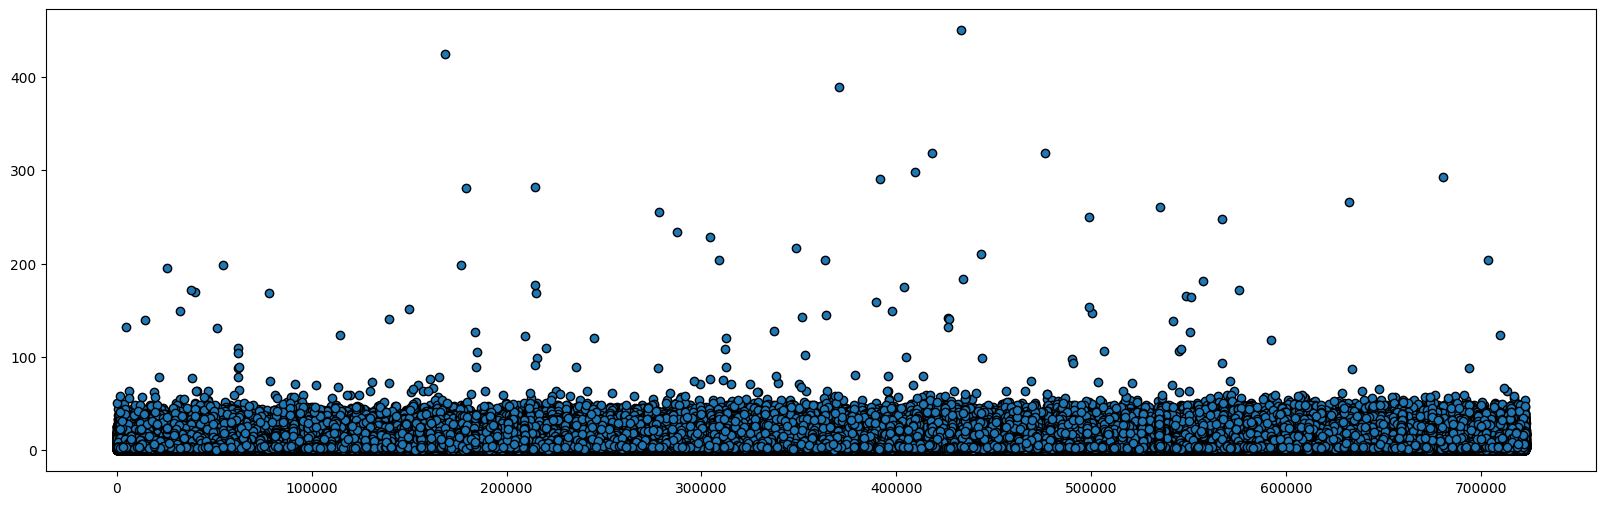

In [17]:
plt.figure(figsize=(20, 6)) 
plt.scatter(tree_subdata['tree_id'],tree_subdata['tree_dbh'],edgecolors='black')
plt.show()

In [18]:
big_trees = tree_subdata[tree_subdata['tree_dbh']>=50]
alive_big_trees = big_trees[big_trees['status']=='Alive']
alive_big_trees.status.value_counts()

status
Alive    403
Name: count, dtype: int64

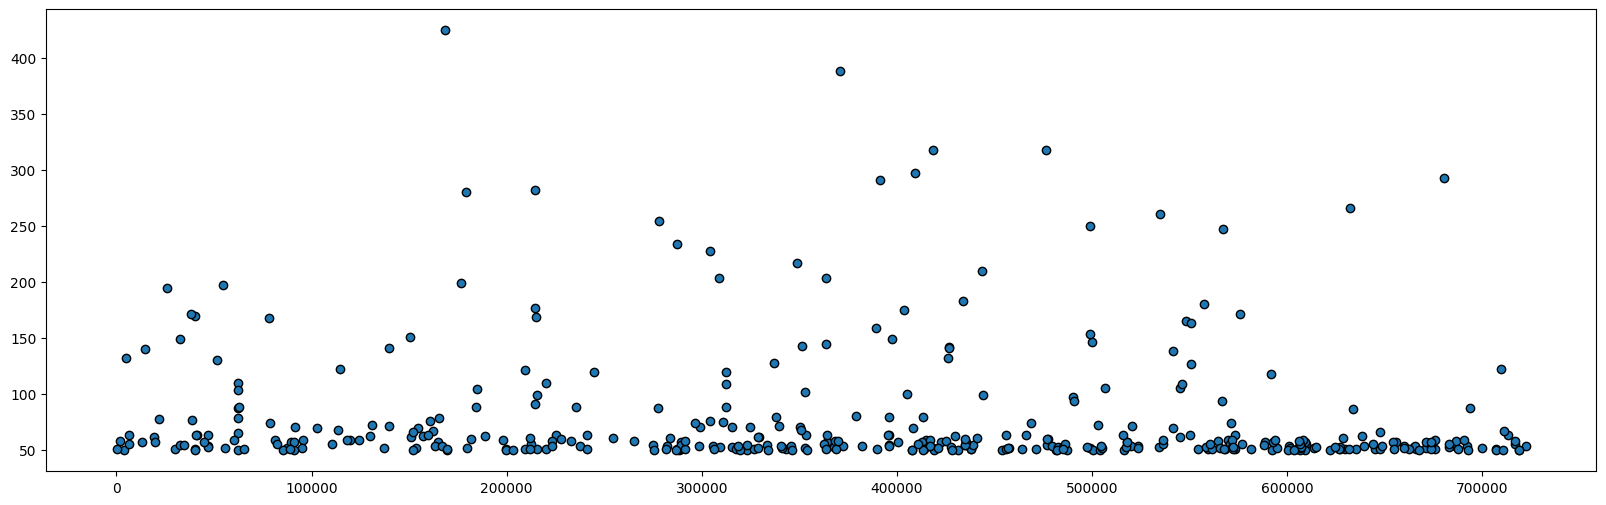

In [19]:
plt.figure(figsize=(20, 6)) 
plt.scatter(alive_big_trees['tree_id'],alive_big_trees['tree_dbh'],edgecolors='black')
plt.show()

In [20]:
status_alive_trees = tree_subdata[tree_subdata['status']=='Alive']
alive_trees = status_alive_trees.groupby("spc_latin")['tree_dbh'].describe().reset_index()[['spc_latin','25%','75%']]
tree_subdata.health.isna().sum()

0

In [21]:
status_alive_trees = status_alive_trees.merge(alive_trees, on='spc_latin', how='left')

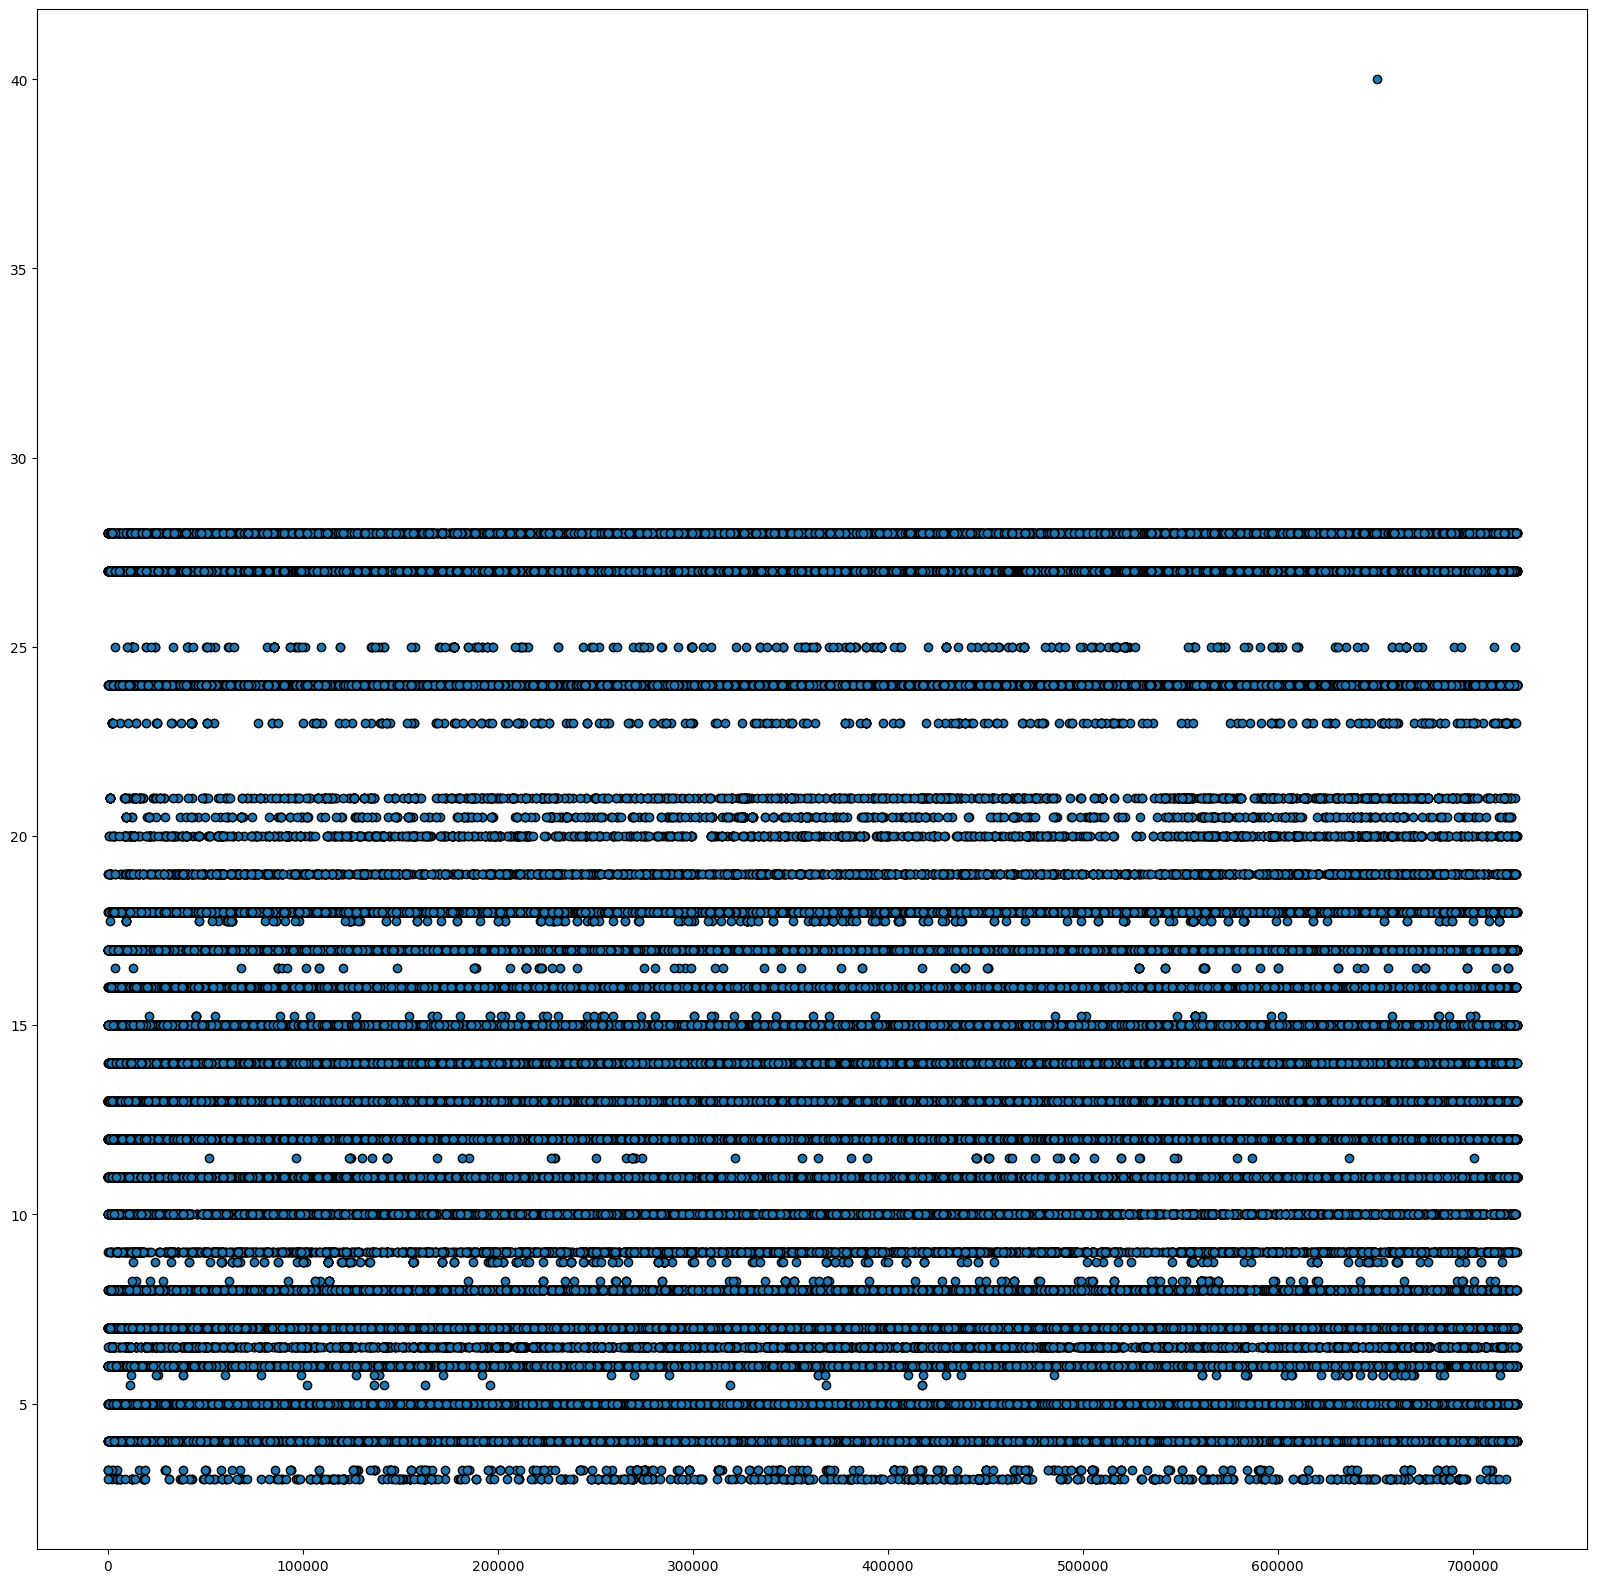

In [25]:
mask1 = status_alive_trees['tree_dbh']<status_alive_trees['25%']
mask2 = status_alive_trees['tree_dbh']<status_alive_trees['75%']
status_alive_trees.loc[mask1, 'tree_dbh'] = status_alive_trees['25%']
status_alive_trees.loc[mask2, 'tree_dbh'] = status_alive_trees['75%']
plt.figure(figsize=(20,20))
plt.scatter(status_alive_trees['tree_id'],status_alive_trees['tree_dbh'],edgecolors='black')
plt.show()
